In [7]:
from pathlib import Path
import cv2
import numpy as np
import json
from matplotlib import pyplot as plt
from xtcocotools.coco import COCO

In [2]:
DATASET_DIR = Path("mp100")

In [9]:
anno_file = list((DATASET_DIR / "annotations").glob("*.json"))[0]
anno = COCO(anno_file)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


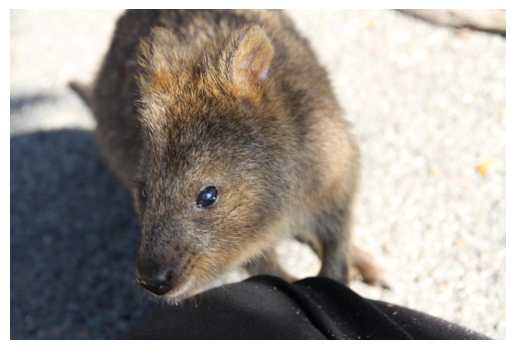

In [95]:
img_id = anno.getImgIds()[0]
img = cv2.imread(str(DATASET_DIR / anno.loadImgs(img_id)[0]['file_name']))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Number of annotations for image 3600000000019700: 1
Image dimensions: 3733x2489
Bounding box for the first annotation: [868.3712310791016, 1260.06591796875, 757.9380798339844, 1028.82568359375]


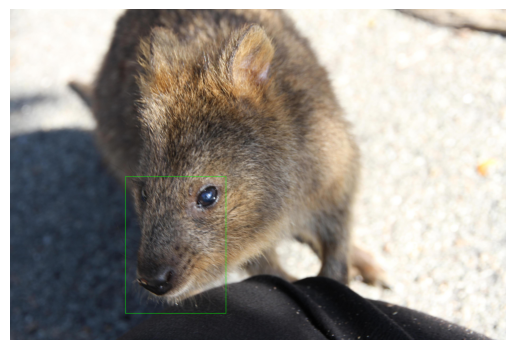

In [96]:
ann_ids = anno.getAnnIds(imgIds=img_id)
objs = anno.loadAnns(ann_ids)

print(f"Number of annotations for image {img_id}: {len(objs)}")

obj = objs[0]
bbox = obj['bbox']

width, height = anno.loadImgs(img_id)[0]['width'], anno.loadImgs(img_id)[0]['height']

print(f"Image dimensions: {width}x{height}")
print(f"Bounding box for the first annotation: {bbox}")

# Draw bounding box on the image
x, y, w, h = map(int, bbox)
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Keypoints for the first annotation: [992.3228149414062, 1367.3265380859375, 2.0, 1029.53564453125, 1417.67333984375, 2.0, 1434.4990234375, 1472.3980712890625, 2.0, 1550.5155029296875, 1362.948486328125, 2.0, 1031.7247314453125, 2030.5906982421875, 2.0, 944.1650390625, 1960.54296875, 2.0, 1353.50634765625, 2032.77978515625, 2.0, 1121.4732666015625, 2166.30810546875, 2.0, 1145.55224609375, 2186.009033203125, 2.0]
Keypoint 0: (992.3228149414062, 1367.3265380859375), visibility: 2.0
Keypoint 1: (1029.53564453125, 1417.67333984375), visibility: 2.0
Keypoint 2: (1434.4990234375, 1472.3980712890625), visibility: 2.0
Keypoint 3: (1550.5155029296875, 1362.948486328125), visibility: 2.0
Keypoint 4: (1031.7247314453125, 2030.5906982421875), visibility: 2.0
Keypoint 5: (944.1650390625, 1960.54296875), visibility: 2.0
Keypoint 6: (1353.50634765625, 2032.77978515625), visibility: 2.0
Keypoint 7: (1121.4732666015625, 2166.30810546875), visibility: 2.0
Keypoint 8: (1145.55224609375, 2186.009033203125)

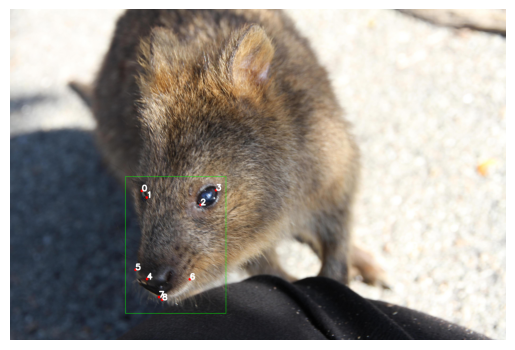

In [97]:
keypoints = obj.get('keypoints', [])
num_keypoints = obj.get('num_keypoints', 0)
print(f"Keypoints for the first annotation: {keypoints}")

if num_keypoints > 0:
    joints_3d = np.zeros((num_keypoints, 3), dtype=np.float32)
    joints_3d_visible = np.zeros((num_keypoints, 3), dtype=np.float32)

    keypoints = np.array(obj['keypoints']).reshape(-1, 3)
    # joints_3d[:, :2] = keypoints[:, :2]
    # joints_3d_visible[:, :2] = np.minimum(1, keypoints[:, 2:3])

    # print(keypoints.shape)
    # print(joints_3d.shape)
    # print(joints_3d_visible.shape)

    # print(f"keypoints: {keypoints}")
    # print(f"3D joints: {joints_3d}")
    # print(f"Visible joints: {joints_3d_visible}")

    for i, (x, y, v) in enumerate(keypoints):
        print(f"Keypoint {i}: ({x}, {y}), visibility: {v}")
        cv2.circle(img, (int(x), int(y)), min(int(np.sqrt(h*w)*0.05), 10), (0, 0, 255) if v > 0 else (255, 0, 0), -1)
        cv2.putText(img, str(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 10)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()